In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

C:\Users\singh\AppData\Local\Temp\ipykernel_21080\381012353.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### No missing values

In [6]:
df.duplicated().sum()

0

#### No Duplicated Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.columns = df.columns.str.replace(' ','-')

In [11]:
print('Categories in gender column: ', end=' ')
print(df['gender'].unique())
print('Categories in race/ethnicity column: ', end=' ')
print(df['race/ethnicity'].unique())
print('Categories in parental-level-of-education column: ', end=' ')
print(df['parental-level-of-education'].unique())
print('Categories in lunch column: ', end=' ')
print(df['lunch'].unique())
print('Categories in test-preparation-course column: ', end=' ')
print(df['test-preparation-course'].unique())

Categories in gender column:  ['female' 'male']
Categories in race/ethnicity column:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental-level-of-education column:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch column:  ['standard' 'free/reduced']
Categories in test-preparation-course column:  ['none' 'completed']


In [12]:
num_features = [feature for feature in df.columns if df[feature].dtype !='O']
cat_features = [feature for feature in df.columns if df[feature].dtype =='O']

print(f'Number of categorical features: {len(cat_features)} and they are: {cat_features}')
print(f'Number of numerical features: {len(num_features)} and they are: {num_features}')


Number of categorical features: 5 and they are: ['gender', 'race/ethnicity', 'parental-level-of-education', 'lunch', 'test-preparation-course']
Number of numerical features: 3 and they are: ['math-score', 'reading-score', 'writing-score']


In [13]:
#The code is adding up the values of the 'math-score', 'reading-score', and 'writing-score' columns in the DataFrame 'df' and assigning the sum to a new column called 'Total-Score'.
df['Total-Score'] = df['math-score'] + df['reading-score'] + df['writing-score']
df['Average-Score'] = df['Total-Score']/3

df.head()

,gender,race/ethnicity,parental-level-of-education,lunch,test-preparation-course,math-score,reading-score,writing-score,Total-Score,Average-Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


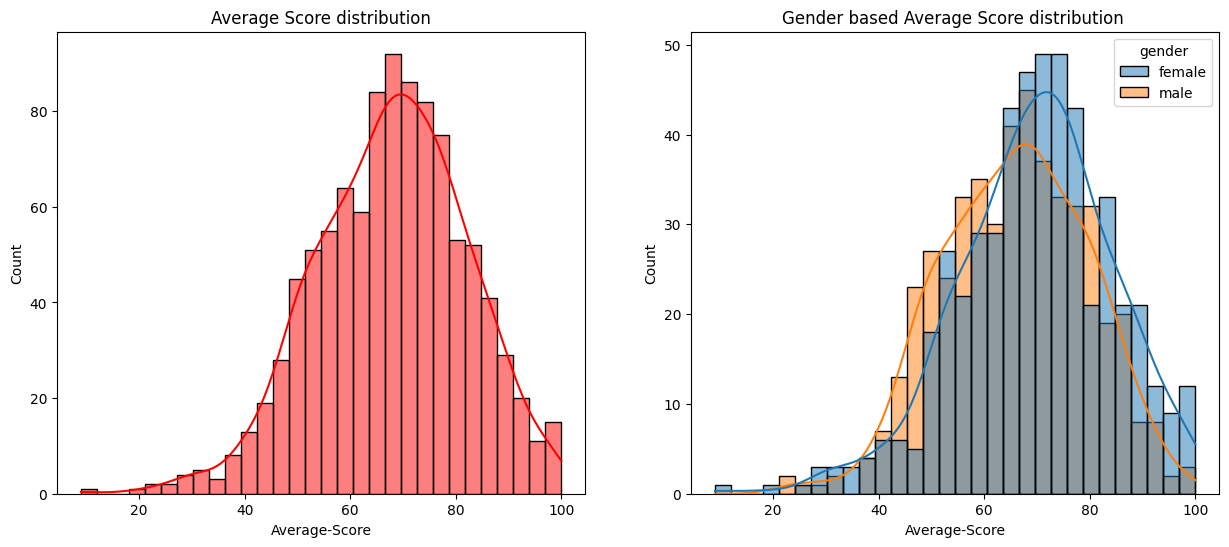

In [14]:
## Visualization 
fig, axs = plt.subplots(1,2,figsize=(15,6))
axs[0].set_title('Average Score distribution')
sns.histplot(data=df,x=df['Average-Score'],kde=True,bins=30,ax=axs[0],color='r')
axs[1].set_title('Gender based Average Score distribution ')
sns.histplot(data=df,x=df['Average-Score'],kde=True,bins=30,ax=axs[1],hue='gender')
plt.show()


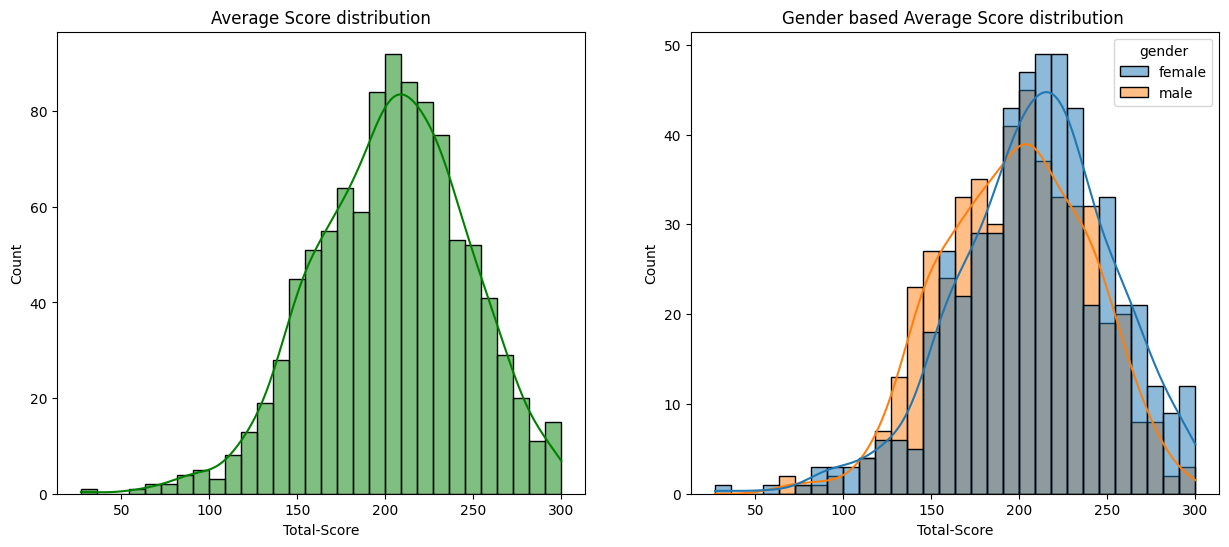

In [15]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
axs[0].set_title('Average Score distribution')
sns.histplot(data=df,x=df['Total-Score'],kde=True,bins=30,ax=axs[0],color='g')
axs[1].set_title('Gender based Average Score distribution ')
sns.histplot(data=df,x=df['Total-Score'],kde=True,bins=30,ax=axs[1],hue='gender')
plt.show()

### Insights 
- Female students tend to perform better than male students

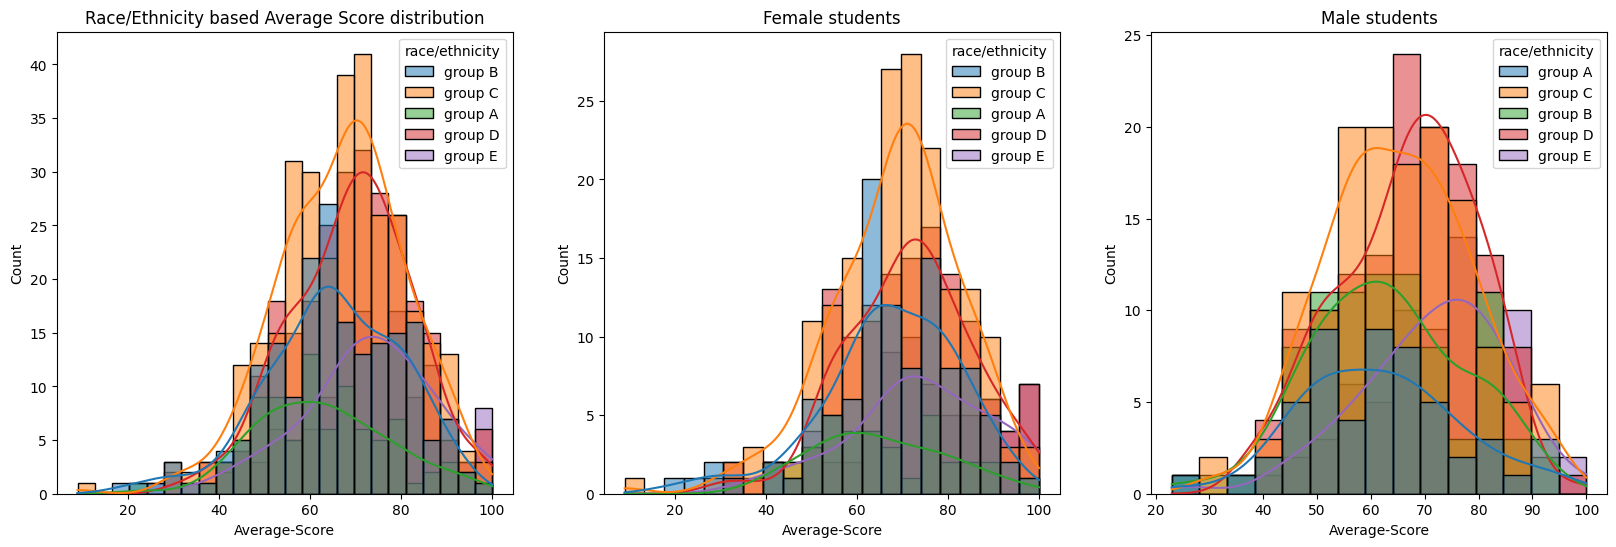

In [16]:
fig, axs = plt.subplots(1,3,figsize=(20,6))
axs[0].set_title('Race/Ethnicity based Average Score distribution')
sns.histplot(data=df,x=df['Average-Score'],kde=True,ax=axs[0],hue='race/ethnicity')
axs[1].set_title('Female students')
sns.histplot(data=df[df.gender=='female'],x='Average-Score',kde=True,ax=axs[1],hue='race/ethnicity')
axs[2].set_title('Male students')
sns.histplot(data=df[df.gender=='male'],x='Average-Score',kde=True,ax=axs[2],hue='race/ethnicity')
plt.show()

#### Insights 
- Students from group C and D tend to have higher average scores than students from other groups

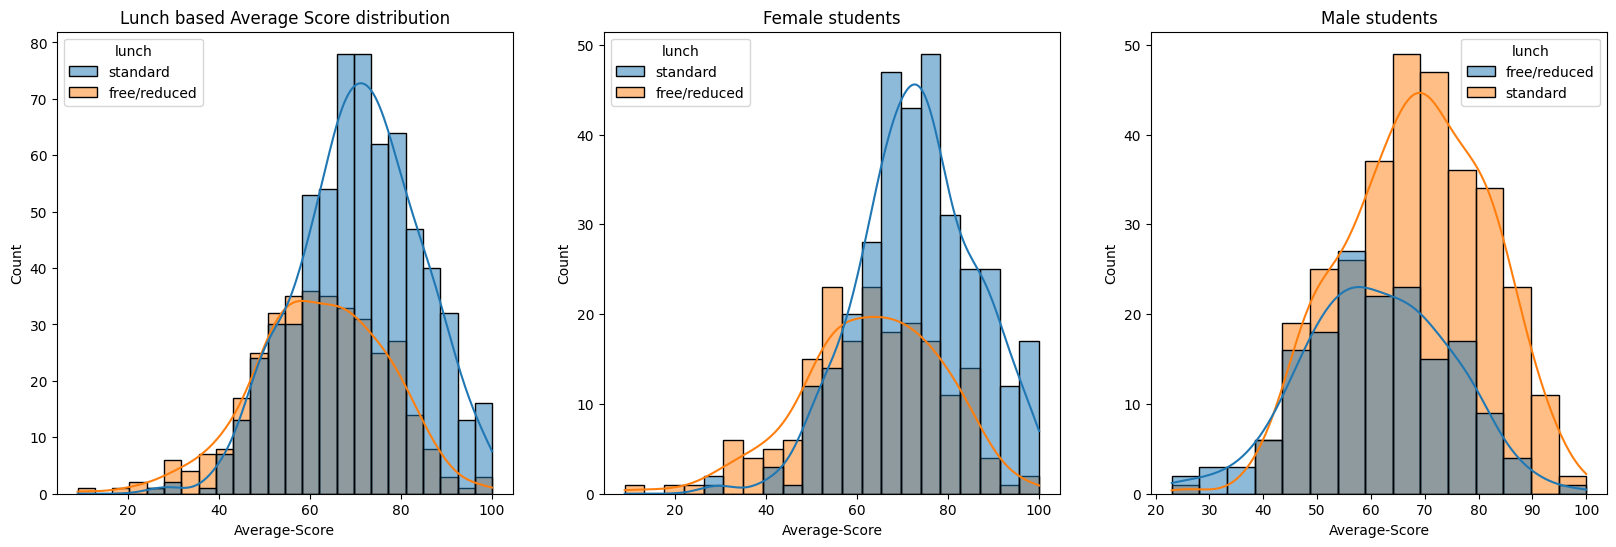

In [17]:
fig, axs = plt.subplots(1,3,figsize=(20,6))
axs[0].set_title('Lunch based Average Score distribution')
sns.histplot(data=df,x=df['Average-Score'],kde=True,ax=axs[0],hue='lunch')
axs[1].set_title('Female students')
sns.histplot(data=df[df.gender=='female'],x='Average-Score',kde=True,ax=axs[1],hue='lunch')
axs[2].set_title('Male students')
sns.histplot(data=df[df.gender=='male'],x='Average-Score',kde=True,ax=axs[2],hue='lunch')
plt.show()

#### Insights
- Standard lunch helps students to perform better in exams


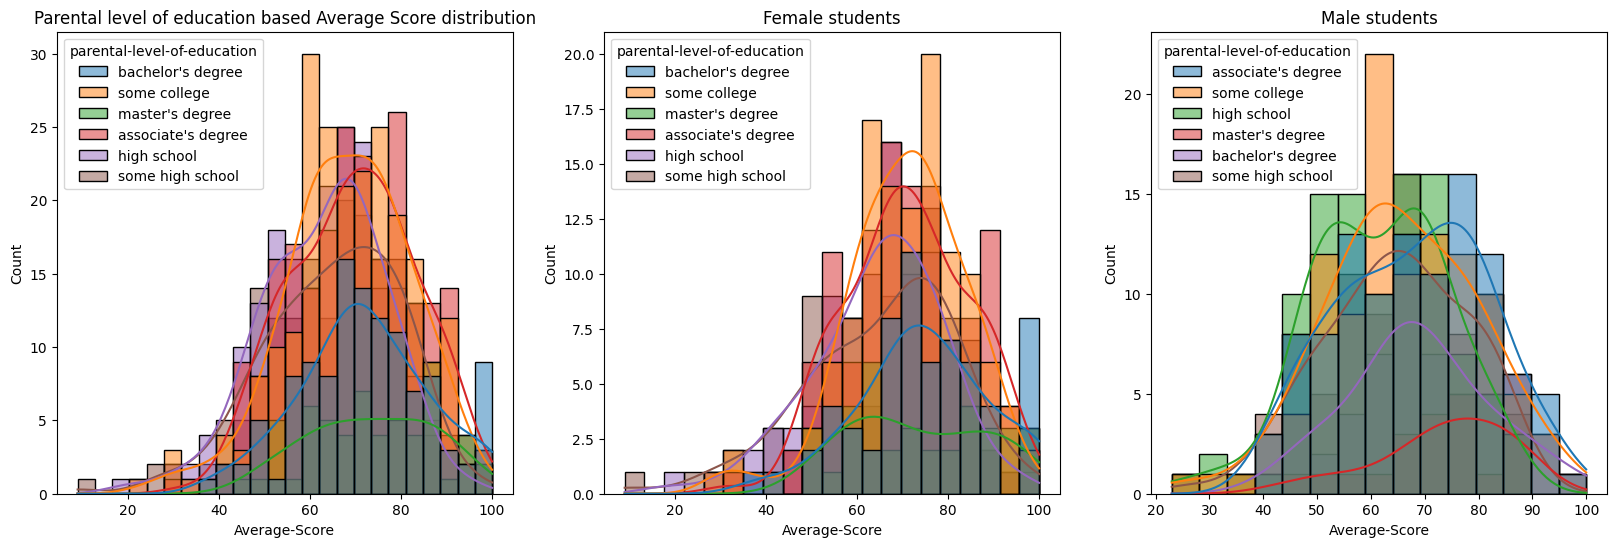

In [18]:
fig, axs = plt.subplots(1,3,figsize=(20,6))
axs[0].set_title('Parental level of education based Average Score distribution')
sns.histplot(data=df,x=df['Average-Score'],kde=True,ax=axs[0],hue='parental-level-of-education')
axs[1].set_title('Female students')
sns.histplot(data=df[df.gender=='female'],x='Average-Score',kde=True,ax=axs[1],hue='parental-level-of-education')
axs[2].set_title('Male students')
sns.histplot(data=df[df.gender=='male'],x='Average-Score',kde=True,ax=axs[2],hue='parental-level-of-education')
plt.show()

#### Insights
- Parental level of education doesn't seem to affect students performance

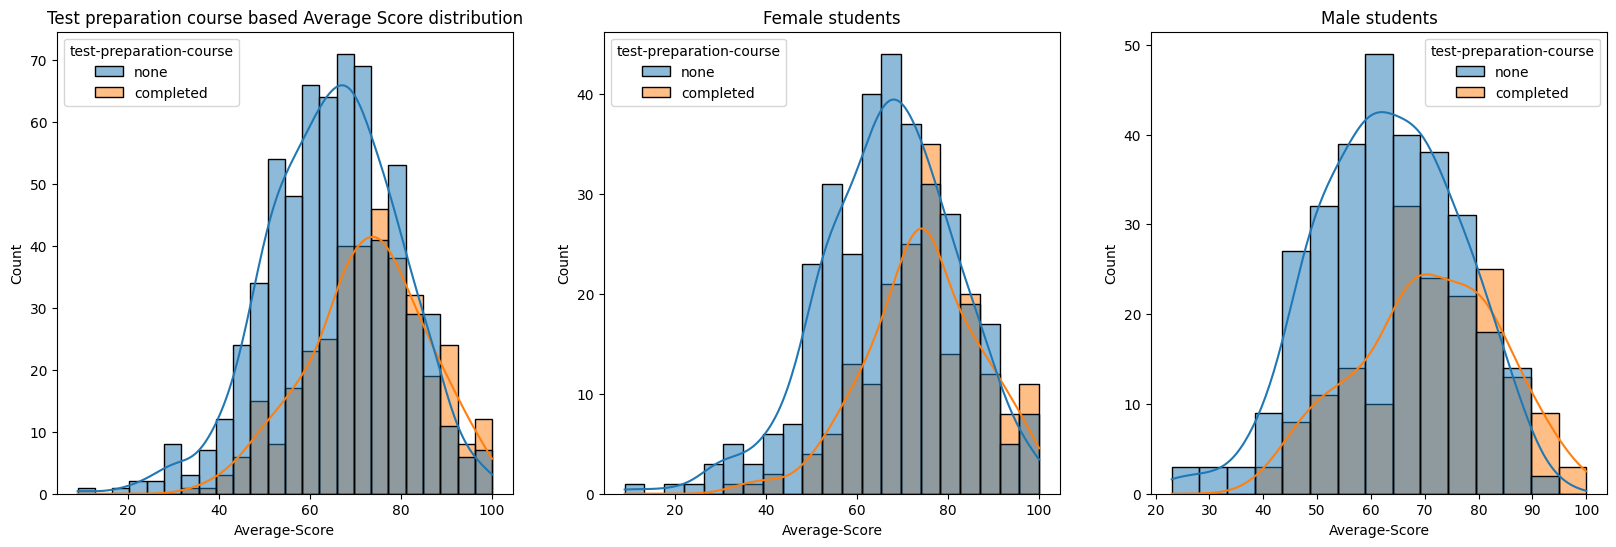

In [19]:
fig, axs = plt.subplots(1,3,figsize=(20,6))
axs[0].set_title('Test preparation course based Average Score distribution')
sns.histplot(data=df,x=df['Average-Score'],kde=True,ax=axs[0],hue='test-preparation-course')
axs[1].set_title('Female students')
sns.histplot(data=df[df.gender=='female'],x='Average-Score',kde=True,ax=axs[1],hue='test-preparation-course')
axs[2].set_title('Male students')
sns.histplot(data=df[df.gender=='male'],x='Average-Score',kde=True,ax=axs[2],hue='test-preparation-course')
plt.show()

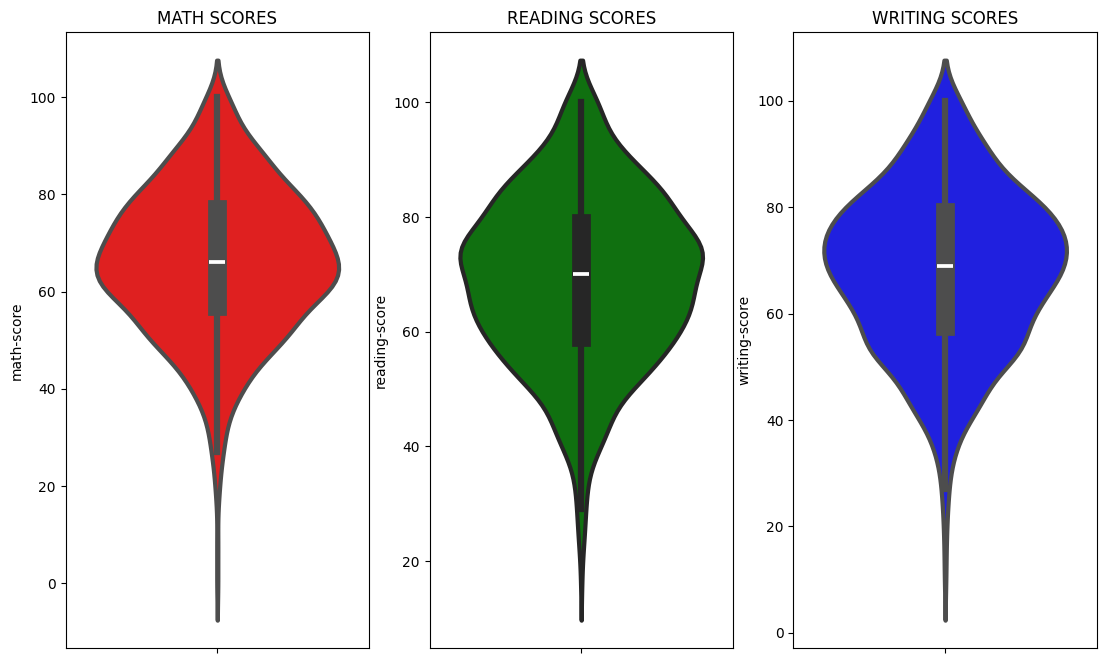

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math-score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading-score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing-score',data=df,color='blue',linewidth=3)
plt.show()

In [32]:
df.head()

,gender,race/ethnicity,parental-level-of-education,lunch,test-preparation-course,math-score,reading-score,writing-score,Total-Score,Average-Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [35]:
df['test-preparation-course'].unique()

array(['none', 'completed'], dtype=object)

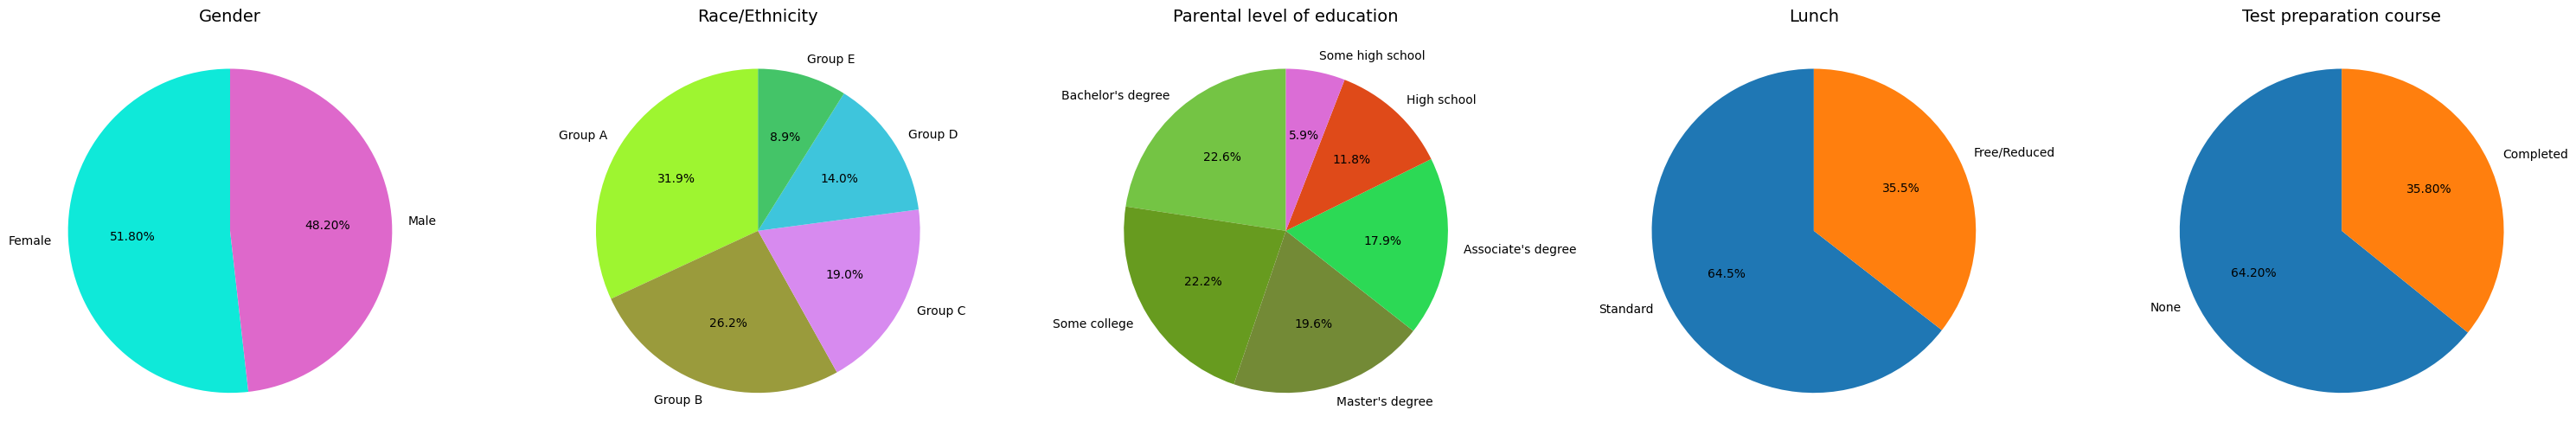

In [45]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ["#0fe9d9","#de68cb"]

plt.pie(size,labels=labels,colors=colors,autopct='%.2f%%',startangle=90.0)
plt.title('Gender', fontsize=14)

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = ['Group A','Group B','Group C','Group D','Group E']
color = ['#9EF530','#9A9B3C','#D78AEF','#3EC5DC','#44C468']
plt.pie(size,labels=labels,autopct='%.1f%%',colors=color,startangle=90.0)
plt.title('Race/Ethnicity', fontsize=14)

plt.subplot(1,5,3)
size = df['parental-level-of-education'].value_counts()
labels = ["Bachelor's degree", 'Some college', "Master's degree", "Associate's degree", 'High school', 'Some high school']
color = ["#d112fb", "#b55ffd", "#34490d", "#35145c", "#c3ca71", "#ec5048"]

plt.pie(size,labels=labels,autopct='%.1f%%',colors=color,startangle=90.0)
plt.title('Parental level of education', fontsize=14)

plt.subplot(1,5,4)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free/Reduced']

plt.pie(size,labels=labels,autopct='%.1f%%',startangle=90.0)
plt.title('Lunch', fontsize=14)

plt.subplot(1,5,5)
size = df['test-preparation-course'].value_counts()
labels = ['None', 'Completed']

plt.pie(size,labels=labels,autopct='%.2f%%',startangle=90.0)
plt.title('Test preparation course', fontsize=14)

plt.tight_layout()
plt.grid()
plt.show()
